<a href="https://colab.research.google.com/github/jdblackiii/jdastro/blob/main/SupernovaeJD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This week I tried to recreate the code from scratch instead of just commenting
on the instructor code. It mostly works, but for some reason the line drawing on the final chart seems bugged. I can't figure out why.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [ ]:
from google.colab import files
uploaded = files.upload()
dat = astropy.io.ascii.read("Tonry_2003.vot")

Saving Tonry_2003.vot to Tonry_2003 (2).vot


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
# The data is provided as the log10 of the distance to the supernovae * hubble
# so doing 10 ^ x "un-does" the log operation, 72 is the value being used for the hubble constant
# This gives us the raw distance
distance = 10**dat["col8"] / 72.0 * u.mpc

#Take velocity directly, add astropy units
velocity = 10**dat["col7"] * u.km / u.s

In [ ]:
# Convert distance to mpc
distance_mpc = distance.to(u.mpc).value
ind = np.where((distance_mpc > 0) & (distance_mpc < 700))

#Find coefficients of polynomial that fits data
coefficients = np.polyfit(distance_mpc[ind], velocity[ind], 1)

#Convert coefficients into polynomial
velocity_model = np.poly1d(coefficients)
velocity_output = velocity_model(distance_mpc)

In [ ]:
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc

Text(50, 30000, '$H_0$ = 67.48 km/s/Mpc')

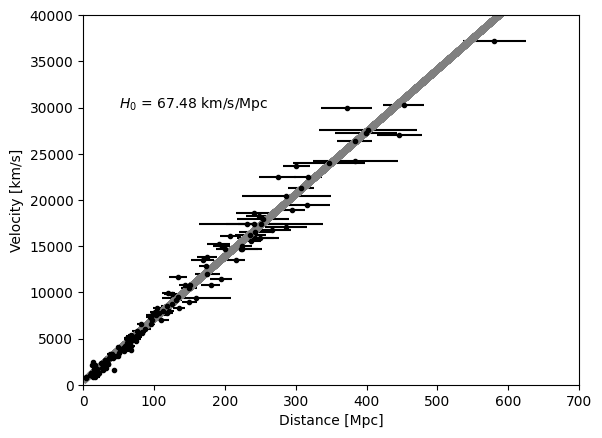

In [ ]:
#Plot local universe
plt.errorbar(distance_mpc, velocity, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance_mpc, velocity_output, color="grey", linewidth=5)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$ = {0:5.2f} km/s/Mpc".format(coefficients[0]), xy=(50, 30000))

In [ ]:
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s

# Convert distance to mpc
distance_mpc = distance.to(u.mpc).value
ind = np.where((distance_mpc > 0) & (distance_mpc < 10e4))

#Find coefficients of polynomial that fits data
coefficients = np.polyfit(distance_mpc[ind], velocity[ind], 1)

#Convert coefficients into polynomial
velocity_model = np.poly1d(coefficients)
velocity_output = velocity_model(distance_mpc)

Text(50, 30000, '$H_0$ = 48.47 km/s/Mpc')

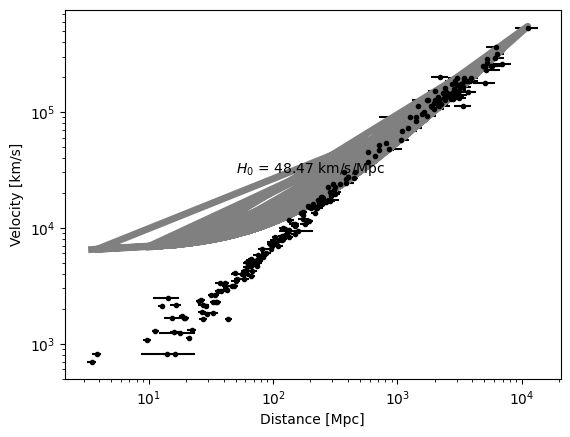

In [ ]:
#Plot local universe
plt.errorbar(distance_mpc, velocity, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance_mpc, velocity_output, color="grey", linewidth=5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$ = {0:5.2f} km/s/Mpc".format(coefficients[0]), xy=(50, 30000))